In [3]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
#load the data
data = pd.read_csv("D:\projects\predictive\equipment_data.csv")
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\afree\AppData\Local\Temp\ipykernel_8536\2942608465.py:2: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv("D:\projects\predictive\equipment_data.csv")


,Timestamp,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
0,2019-01-01 00:00:00,0.548793,0.509840,0.619918,0.741161,1,0.501129,0.499619
1,2019-01-01 01:00:00,0.715185,0.587573,0.802121,0.292862,1,0.584882,0.538630
2,2019-01-01 02:00:00,0.602748,0.294453,0.965546,0.624416,1,0.444534,0.352514
3,2019-01-01 03:00:00,0.544862,0.500041,0.519955,0.931955,0,0.471992,0.602794
4,2019-01-01 04:00:00,0.423622,0.031649,0.323663,0.799867,0,0.440103,0.264552


In [5]:
#explore the data 
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             43800 non-null  object 
 1   Temperature (°C)      43800 non-null  float64
 2   Vibration (mm/s)      43800 non-null  float64
 3   Pressure (Pa)         43800 non-null  float64
 4   RPM                   43800 non-null  float64
 5   Maintenance Required  43800 non-null  int64  
 6   Temp_Change           43800 non-null  float64
 7   Vib_Change            43800 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.7+ MB


In [6]:
#check for null values
data.isnull().sum()

Timestamp               0
Temperature (°C)        0
Vibration (mm/s)        0
Pressure (Pa)           0
RPM                     0
Maintenance Required    0
Temp_Change             0
Vib_Change              0
dtype: int64

In [7]:
#feature engineering
data['Timestamp']=pd.to_datetime(data['Timestamp'])

data['year']=data['Timestamp'].dt.year
data['month']=data['Timestamp'].dt.month
data['day']=data['Timestamp'].dt.day

data['hour']=data['Timestamp'].dt.hour
data['min']=data['Timestamp'].dt.minute
data['sec']=data['Timestamp'].dt.second

data = data.drop(data.columns[[0]], axis=1)

print(data.info())
print("#"*25)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (°C)      43800 non-null  float64
 1   Vibration (mm/s)      43800 non-null  float64
 2   Pressure (Pa)         43800 non-null  float64
 3   RPM                   43800 non-null  float64
 4   Maintenance Required  43800 non-null  int64  
 5   Temp_Change           43800 non-null  float64
 6   Vib_Change            43800 non-null  float64
 7   year                  43800 non-null  int32  
 8   month                 43800 non-null  int32  
 9   day                   43800 non-null  int32  
 10  hour                  43800 non-null  int32  
 11  min                   43800 non-null  int32  
 12  sec                   43800 non-null  int32  
dtypes: float64(6), int32(6), int64(1)
memory usage: 3.3 MB
None
#########################


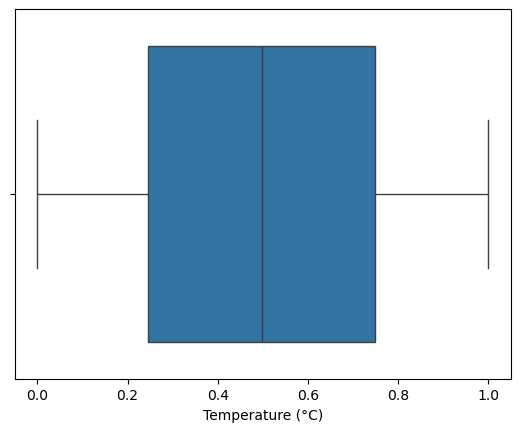

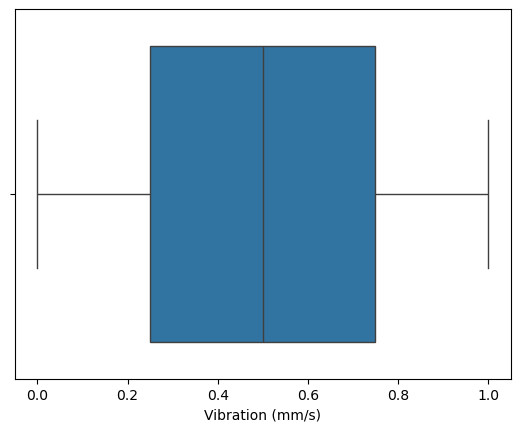

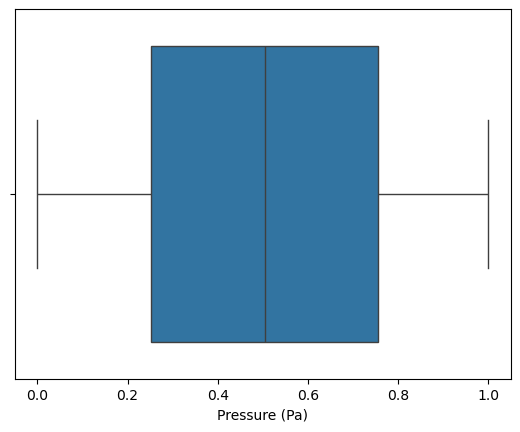

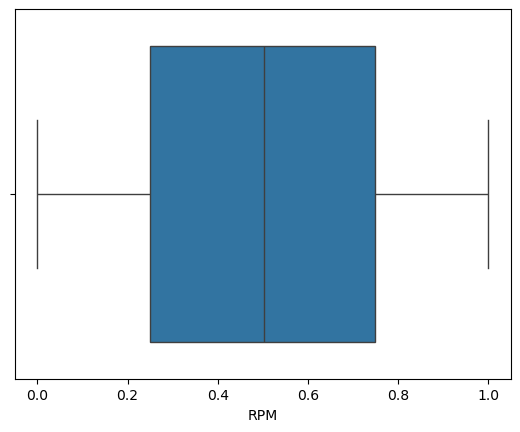

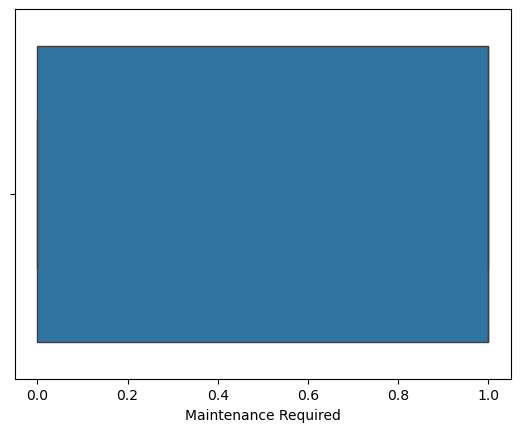

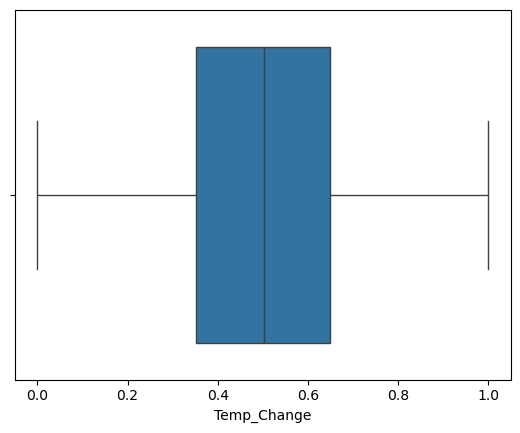

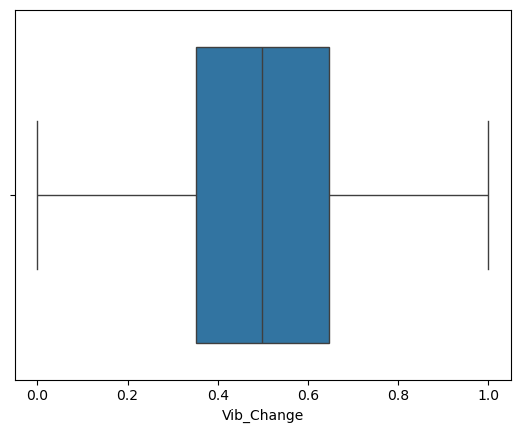

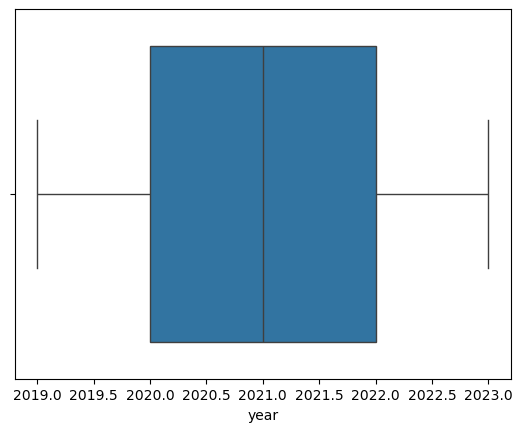

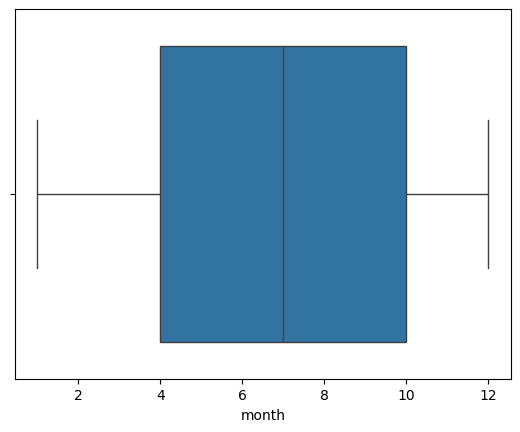

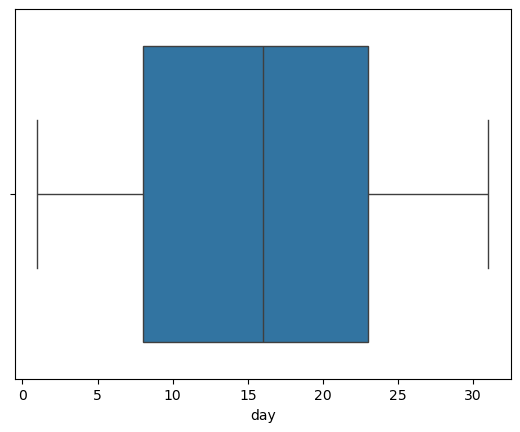

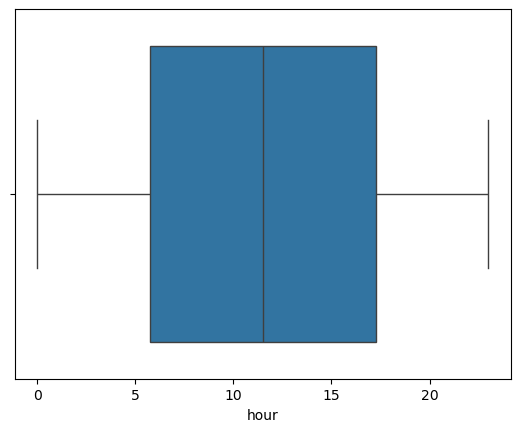

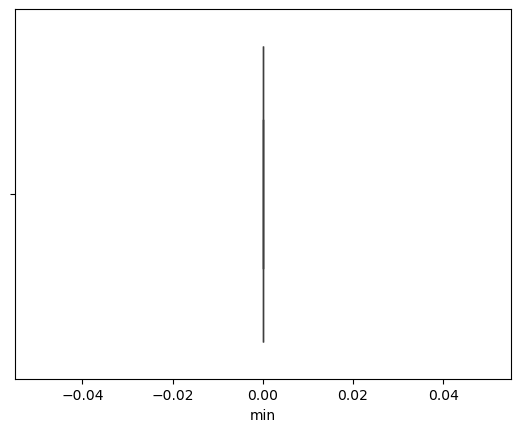

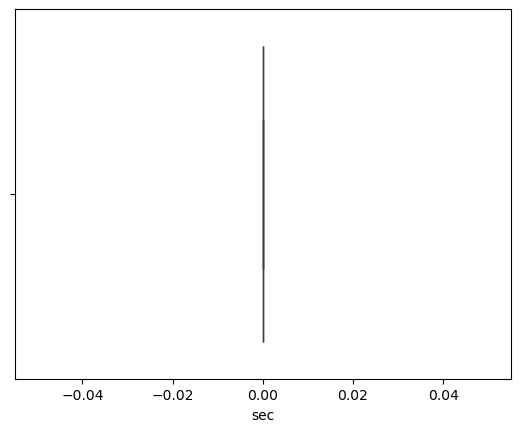

In [8]:
#boxplot to identify outliers
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data,x=i)
    plt.show()

In [9]:
y = data[['Maintenance Required']]
y

,Maintenance Required
0,1
1,1
2,1
3,0
4,0
...,...
43795,0
43796,1
43797,0
43798,0


In [10]:
X = data.drop('Maintenance Required', axis=1)
X

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Temp_Change,Vib_Change,year,month,day,hour,min,sec
0,0.548793,0.509840,0.619918,0.741161,0.501129,0.499619,2019,1,1,0,0,0
1,0.715185,0.587573,0.802121,0.292862,0.584882,0.538630,2019,1,1,1,0,0
2,0.602748,0.294453,0.965546,0.624416,0.444534,0.352514,2019,1,1,2,0,0
3,0.544862,0.500041,0.519955,0.931955,0.471992,0.602794,2019,1,1,3,0,0
4,0.423622,0.031649,0.323663,0.799867,0.440103,0.264552,2019,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43795,0.719535,0.251835,0.403438,0.868579,0.479896,0.525060,2023,12,30,19,0,0
43796,0.883550,0.633510,0.669265,0.702468,0.583686,0.691166,2023,12,30,20,0,0
43797,0.516298,0.338688,0.206265,0.989326,0.316272,0.351660,2023,12,30,21,0,0
43798,0.861137,0.141975,0.368326,0.045364,0.674704,0.400896,2023,12,30,22,0,0


In [11]:
#data splitting as train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [12]:
X_train

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Temp_Change,Vib_Change,year,month,day,hour,min,sec
25563,0.697670,0.904598,0.998646,0.930620,0.613334,0.634800,2021,12,1,3,0,0
38398,0.648472,0.233375,0.829270,0.173449,0.820100,0.207676,2023,5,19,22,0,0
14428,0.660066,0.111110,0.676515,0.397598,0.491433,0.218706,2020,8,24,4,0,0
40742,0.867443,0.958031,0.940020,0.076051,0.883473,0.817762,2023,8,25,14,0,0
39049,0.913365,0.309935,0.753343,0.148099,0.495612,0.648313,2023,6,16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0.749590,0.472035,0.161321,0.991995,0.570457,0.547996,2020,4,25,12,0,0
27640,0.118890,0.311915,0.214885,0.793195,0.348411,0.245009,2022,2,25,16,0,0
14501,0.332990,0.630172,0.919814,0.270847,0.438677,0.763106,2020,8,27,5,0,0
30727,0.745628,0.724226,0.391012,0.199466,0.692597,0.367094,2022,7,4,7,0,0


In [13]:
X_test

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Temp_Change,Vib_Change,year,month,day,hour,min,sec
19019,0.872107,0.324489,0.447161,0.983989,0.439402,0.654658,2021,3,3,11,0,0
2787,0.649058,0.405844,0.144200,0.320213,0.758539,0.461728,2019,4,27,3,0,0
4211,0.962486,0.219026,0.108354,0.568379,0.584272,0.332514,2019,6,25,11,0,0
41075,0.087367,0.081900,0.299782,0.037358,0.060112,0.276517,2023,9,8,11,0,0
24976,0.738439,0.980941,0.900137,0.014676,0.629914,0.720105,2021,11,6,16,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34587,0.464143,0.271677,0.010662,0.224149,0.287443,0.432609,2022,12,12,3,0,0
31170,0.554773,0.329934,0.505543,0.975984,0.288634,0.612772,2022,7,22,18,0,0
9863,0.843048,0.443221,0.022389,0.178786,0.851649,0.596970,2020,2,15,23,0,0
36387,0.443681,0.259018,0.208535,0.605070,0.527530,0.218276,2023,2,25,3,0,0


In [14]:
y_train

,Maintenance Required
25563,1
38398,0
14428,0
40742,1
39049,1
...,...
11532,0
27640,1
14501,0
30727,1


In [15]:
y_test

,Maintenance Required
19019,1
2787,1
4211,0
41075,1
24976,1
...,...
34587,0
31170,1
9863,0
36387,1


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100,random_state=40,min_samples_split=20,max_features=8,max_depth=9)
model.fit(X_train, y_train)

C:\Users\afree\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=9, max_features=8, min_samples_split=20,
                       random_state=40)

In [17]:
y_test_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Accuracy: 0.5090182648401826
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      4390
           1       0.51      0.55      0.53      4370

    accuracy                           0.51      8760
   macro avg       0.51      0.51      0.51      8760
weighted avg       0.51      0.51      0.51      8760



In [18]:
#hyperparameter tuning
rf_params = {"max_depth" : [5, 8, 15, None, 10],
             "max_features" : [5, 7, "auto", 8],
             "min_samples_split" : [2, 8, 15, 20],
             "n_estimators" : [100, 200, 500, 1000]}

In [19]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [20]:
randomcv_models = [("RF", RandomForestClassifier(), rf_params)]

In [21]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [22]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    model.fit(X_train, y_train)
    #model_param[name] = random.best_params_
    best_ = RandomizedSearchCV(model, params, refit=True, n_jobs=-1).fit(X_train, y_train).best_params_

for model_name in best_:
    print(f"-------------------Best Params for {model_name}------------------------")
    print(best_[model_name])

C:\Users\afree\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [35]:
#forecasting model building
#LSTM??
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv("D:\projects\predictive\equipment_data.csv", index_col='Timestamp',parse_dates=True)
data.head()


<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\afree\AppData\Local\Temp\ipykernel_8536\1080454268.py:1: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_csv("D:\projects\predictive\equipment_data.csv", index_col='Timestamp',parse_dates=True)


,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
Timestamp,,,,,,,
2019-01-01 00:00:00,0.548793,0.509840,0.619918,0.741161,1,0.501129,0.499619
2019-01-01 01:00:00,0.715185,0.587573,0.802121,0.292862,1,0.584882,0.538630
2019-01-01 02:00:00,0.602748,0.294453,0.965546,0.624416,1,0.444534,0.352514
2019-01-01 03:00:00,0.544862,0.500041,0.519955,0.931955,0,0.471992,0.602794
2019-01-01 04:00:00,0.423622,0.031649,0.323663,0.799867,0,0.440103,0.264552


<Axes: xlabel='Timestamp'>

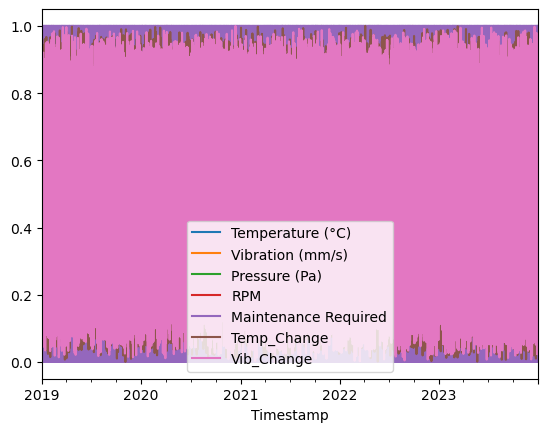

In [39]:
data.plot()

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

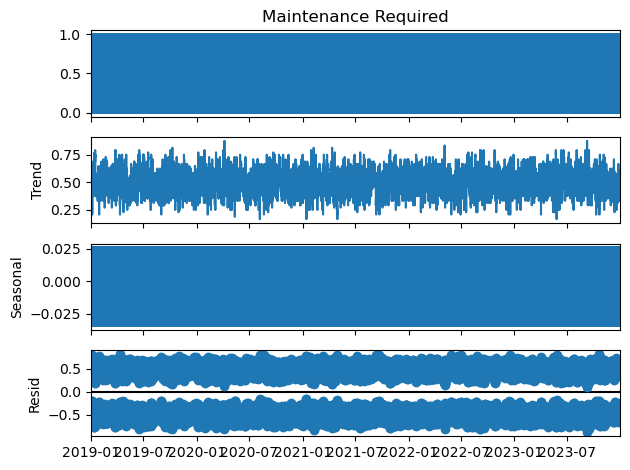

In [43]:
results = seasonal_decompose(data['Maintenance Required'])
results.plot();

In [45]:
len(data)

43800

In [47]:
#test--->1 month=24*31=744
#train--->43800-744=43056
train = data.iloc[:43056]
test = data.iloc[43056:]

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
data.head()

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
Timestamp,,,,,,,
2019-01-01 00:00:00,0.548793,0.509840,0.619918,0.741161,1,0.501129,0.499619
2019-01-01 01:00:00,0.715185,0.587573,0.802121,0.292862,1,0.584882,0.538630
2019-01-01 02:00:00,0.602748,0.294453,0.965546,0.624416,1,0.444534,0.352514
2019-01-01 03:00:00,0.544862,0.500041,0.519955,0.931955,0,0.471992,0.602794
2019-01-01 04:00:00,0.423622,0.031649,0.323663,0.799867,0,0.440103,0.264552


In [53]:
data.tail()

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
Timestamp,,,,,,,
2023-12-30 19:00:00,0.719535,0.251835,0.403438,0.868579,0,0.479896,0.525060
2023-12-30 20:00:00,0.883550,0.633510,0.669265,0.702468,1,0.583686,0.691166
2023-12-30 21:00:00,0.516298,0.338688,0.206265,0.989326,0,0.316272,0.351660
2023-12-30 22:00:00,0.861137,0.141975,0.368326,0.045364,0,0.674704,0.400896
2023-12-30 23:00:00,0.917329,0.794854,0.626119,0.351568,1,0.529413,0.827271


In [55]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [57]:
scaled_train[:10]

array([[0.54879291, 0.50983968, 0.61991409, 0.74116077, 1.        ,
        0.50112899, 0.49961873],
       [0.7151845 , 0.5875731 , 0.80211908, 0.29286191, 1.        ,
        0.58488241, 0.53862988],
       [0.60274788, 0.29445338, 0.96554556, 0.62441628, 1.        ,
        0.44453387, 0.35251419],
       [0.54486222, 0.5000408 , 0.51995084, 0.93195464, 0.        ,
        0.47199216, 0.60279446],
       [0.42362238, 0.03164888, 0.3236566 , 0.79986658, 0.        ,
        0.44010276, 0.2645524 ],
       [0.6458827 , 0.86597883, 0.41990718, 0.45230153, 0.        ,
        0.613004  , 0.91833406],
       [0.43755611, 0.90671923, 0.01719209, 0.1581054 , 0.        ,
        0.39626753, 0.52006463],
       [0.89178482, 0.98359261, 0.03008248, 0.95263509, 0.        ,
        0.7297656 , 0.53819826],
       [0.96368138, 0.87577036, 0.42265639, 0.8832555 , 0.        ,
        0.53731821, 0.44550725],
       [0.3834053 , 0.95976799, 0.50973067, 0.87191461, 0.        ,
        0.20904627, 0.5

In [59]:
#pip install keras

In [61]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input = 3
n_features = 7
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [63]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'predict this y: \n {y}')

Given the Array: 
[0.54879291 0.50983968 0.61991409 0.74116077 1.         0.50112899
 0.49961873 0.7151845  0.5875731  0.80211908 0.29286191 1.
 0.58488241 0.53862988 0.60274788 0.29445338 0.96554556 0.62441628
 1.         0.44453387 0.35251419]
predict this y: 
 [[0.54486222 0.5000408  0.51995084 0.93195464 0.         0.47199216
  0.60279446]]


In [65]:
X.shape

(1, 3, 7)

In [67]:
n_input = 744
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [71]:
#define the model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\afree\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          43,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,301 (169.14 KB)

 Trainable params: 43,301 (169.14 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
#fit model
model.fit(generator, epochs=50)

Epoch 1/50


C:\Users\afree\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42312/42312 ━━━━━━━━━━━━━━━━━━━━ 36512s 863ms/step - loss: 0.0961
Epoch 2/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 24463s 578ms/step - loss: 0.0952
Epoch 3/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 5261s 124ms/step - loss: 0.0948
Epoch 4/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4324s 102ms/step - loss: 0.0947
Epoch 5/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4407s 104ms/step - loss: 0.0948
Epoch 6/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4384s 104ms/step - loss: 0.0949
Epoch 7/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4462s 105ms/step - loss: 0.0950
Epoch 8/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4205s 99ms/step - loss: 0.0948
Epoch 9/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4193s 99ms/step - loss: 0.0948
Epoch 10/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4083s 96ms/step - loss: 0.0945
Epoch 11/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4105s 97ms/step - loss: 0.0951
Epoch 12/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4171s 99ms/step - loss: 0.0949
Epoch 13/50
42312/42312 ━━━━━━━━━━━━━━━━━━━━ 4239s 100ms/step - loss: 0.0949
Epoch 14/50
42312/4231

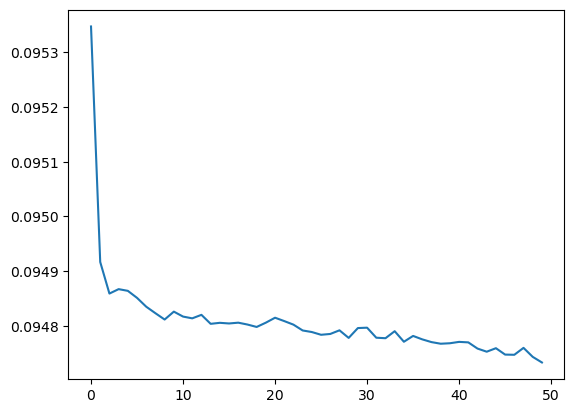

In [77]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [79]:
last_train_batch = scaled_train[-12:]

In [85]:
last_train_batch = last_train_batch.reshape((1, 12, n_features))

In [87]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.49445376]], dtype=float32)

In [89]:
scaled_test[0]

array([0.94503526, 0.32616052, 0.9539985 , 0.79119413, 1.        ,
       0.49924569, 0.57400643])

In [97]:
test_predictions = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)

    current_pred = current_pred.reshape(1,1,1)
    current_pred = np.repeat(current_pred, n_features, axis=2)
    current_batch = np.append(current_batch[:,1:,:], current_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━

In [99]:
test_predictions

[array([0.49445376], dtype=float32),
 array([0.49525383], dtype=float32),
 array([0.5005539], dtype=float32),
 array([0.5005616], dtype=float32),
 array([0.5005816], dtype=float32),
 array([0.50075275], dtype=float32),
 array([0.5005796], dtype=float32),
 array([0.5006233], dtype=float32),
 array([0.50057787], dtype=float32),
 array([0.5005641], dtype=float32),
 array([0.5005707], dtype=float32),
 array([0.50051504], dtype=float32),
 array([0.500535], dtype=float32),
 array([0.5005313], dtype=float32),
 array([0.50053144], dtype=float32),
 array([0.50053173], dtype=float32),
 array([0.50053144], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.50053155], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.5005316], dtype=float32),
 array([0.5005316], 

In [101]:
test.head()

,Temperature (°C),Vibration (mm/s),Pressure (Pa),RPM,Maintenance Required,Temp_Change,Vib_Change
Timestamp,,,,,,,
2023-11-30 00:00:00,0.945035,0.326161,0.953999,0.791194,1,0.499246,0.574006
2023-11-30 01:00:00,0.964538,0.875996,0.716060,0.212141,1,0.510946,0.775558
2023-11-30 02:00:00,0.157745,0.675500,0.733788,0.503669,1,0.095029,0.398998
2023-11-30 03:00:00,0.115198,0.656084,0.524953,0.656438,0,0.479713,0.489875
2023-11-30 04:00:00,0.598944,0.077761,0.536358,0.576384,0,0.744623,0.209383


In [143]:
import numpy as np
n_features = 7
test_predictions = np.array(test_predictions).reshape(-1, 1)

# Padding with zeros to match the original number of features
padded_test_predictions = np.zeros((len(test_predictions), n_features))
padded_test_predictions[:, 0] = test_predictions.flatten()
true_predictions = scaler.inverse_transform(padded_test_predictions)

In [145]:
test['Predictions'] = true_predictions

C:\Users\afree\AppData\Local\Temp\ipykernel_8536\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [147]:
test['Maintenance Required']

Timestamp
2023-11-30 00:00:00    0.494454
2023-11-30 01:00:00    0.495254
2023-11-30 02:00:00    0.500554
2023-11-30 03:00:00    0.500562
2023-11-30 04:00:00    0.500582
                         ...   
2023-12-30 19:00:00    0.500532
2023-12-30 20:00:00    0.500532
2023-12-30 21:00:00    0.500532
2023-12-30 22:00:00    0.500532
2023-12-30 23:00:00    0.500532
Name: Maintenance Required, Length: 744, dtype: float64

In [155]:
true_predictions

array([0.49445376, 0.49525383, 0.50055391, 0.50056159, 0.50058162,
       0.50075275, 0.5005796 , 0.50062329, 0.50057787, 0.5005641 ,
       0.50057071, 0.50051504, 0.50053501, 0.50053132, 0.50053144,
       0.50053173, 0.50053144, 0.50053161, 0.50053155, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053161,
       0.50053161, 0.50053161, 0.50053161, 0.50053161, 0.50053

<Axes: xlabel='Timestamp'>

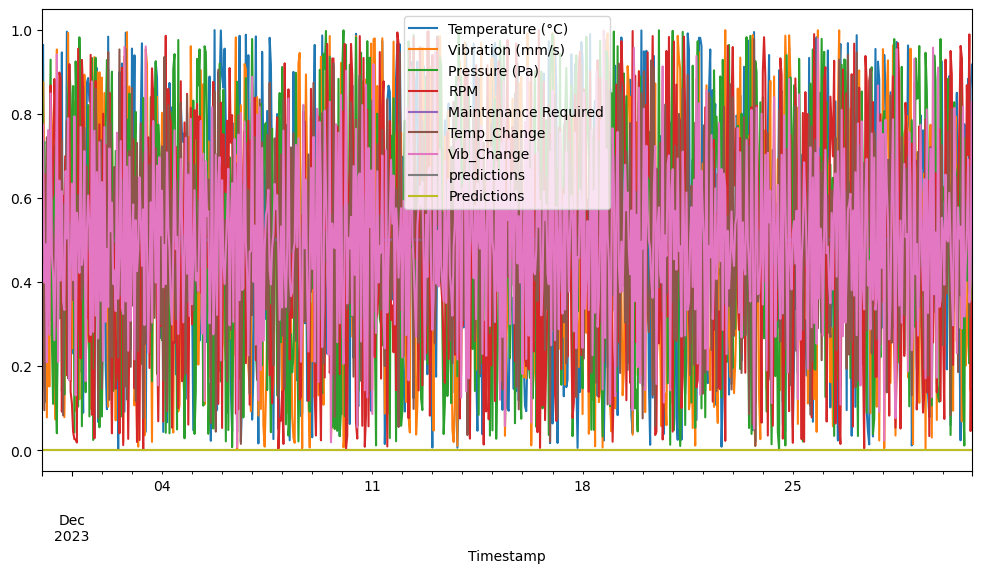

In [137]:
test.plot(figsize=(12,6))

In [151]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
n_features = 7

test_predictions = np.array(test_predictions).reshape(-1, 1)

temp_predictions = np.zeros((len(test_predictions), n_features))
temp_predictions[:, 0] = test_predictions.flatten() 

true_predictions = scaler.inverse_transform(temp_predictions)[:, 0]
test['predictions'] = true_predictions

#rmse
rmse = sqrt(mean_squared_error(test['Maintenance Required'], test['predictions']))
print(rmse)

0.0


C:\Users\afree\AppData\Local\Temp\ipykernel_8536\2062026406.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions  # Assign the 1D array


In [153]:
import pandas as pd
comparison_df = pd.DataFrame({'Original': test['Maintenance Required'], 'Predicted': test['predictions']})
print(comparison_df)

                     Original  Predicted
Timestamp                               
2023-11-30 00:00:00  0.494454   0.494454
2023-11-30 01:00:00  0.495254   0.495254
2023-11-30 02:00:00  0.500554   0.500554
2023-11-30 03:00:00  0.500562   0.500562
2023-11-30 04:00:00  0.500582   0.500582
...                       ...        ...
2023-12-30 19:00:00  0.500532   0.500532
2023-12-30 20:00:00  0.500532   0.500532
2023-12-30 21:00:00  0.500532   0.500532
2023-12-30 22:00:00  0.500532   0.500532
2023-12-30 23:00:00  0.500532   0.500532

[744 rows x 2 columns]
